In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
def analyze_results(filename):
    # read data
    df = pd.read_parquet(filename)
    history_dict = df.T.to_dict()
    counter = df['success'].value_counts().to_dict()
    if True not in counter:
        counter[True] = 0
    display(df.head())
    
    # losses plot
    legend_elements = [Line2D([0], [0], color='tab:green', label=f"success: {counter[True]}"),
                   Line2D([0], [0], color='tab:red', label=f"fail: {counter[False]}")]


    plt.figure(figsize=(7, 5), dpi=100)
    for i in history_dict:
        color = 'tab:green' if history_dict[i]['success'] else 'tab:red'
        alpha = 0.8 if history_dict[i]['success'] else 0.5
        plt.plot(history_dict[i]['history_loss'], color=color, alpha=alpha)
    plt.legend(handles=legend_elements)
    plt.ylim(-0.01)
    plt.xlabel('epochs')
    plt.ylabel('train loss')
    plt.show()
    
    # success piechart
    counts = [counter[key] for key in sorted(counter.keys(), reverse=True)]
    labels = list(map(lambda x: 'success' if x else 'fail', sorted(counter.keys(), reverse=True)))
    # list(map(lambda x: 'success' if x else 'fail', sorted(counter.keys())))
    colors = {'success': 'tab:green',
              'fail': 'tab:red'}

    plt.figure(figsize=(5,5))
    plt.pie(x=counts, 
            labels=labels,
            colors=[colors[key] for key in labels],
            startangle=90,
            autopct='%.0f%%',
            textprops={'fontsize': 16})
    plt.show()
    
    # stats of success history len
    stat_succ_hist_len = df[df['success']]['history_len'].describe()
    display(stat_succ_hist_len)
    
    # distribution of success history len
    display(df[df['success']]['history_len'].hist(bins=20))
    

,history_1,history_1_len,history_2,history_2_len,history_loss,history_len,num_base_neurons,success
0,"[0.7353111505508423, 0.7314735651016235, 0.727...",5000,"[0.7353111505508423, 0.7314735651016235, 0.727...",51,"[0.7395160794258118, 0.7357547879219055, 0.732...",50000,2,False
1,"[0.7056913375854492, 0.7046118974685669, 0.703...",5000,"[0.7056913375854492, 0.7046118974685669, 0.703...",41,"[0.7688856720924377, 0.7630926370620728, 0.757...",13903,2,True
2,"[0.7142205834388733, 0.7122373580932617, 0.710...",5000,"[0.7142205834388733, 0.7122373580932617, 0.710...",6,"[0.6962589621543884, 0.6952719688415527, 0.694...",50000,2,False
3,"[0.7012432813644409, 0.7007572054862976, 0.700...",5000,"[0.7012432813644409, 0.7007572054862976, 0.700...",20,"[0.6932640075683594, 0.6932937502861023, 0.693...",50000,2,False
4,"[0.7081760764122009, 0.7071996331214905, 0.706...",5000,"[0.7081760764122009, 0.7071996331214905, 0.706...",6,"[0.6966422200202942, 0.6954686641693115, 0.694...",50000,2,False


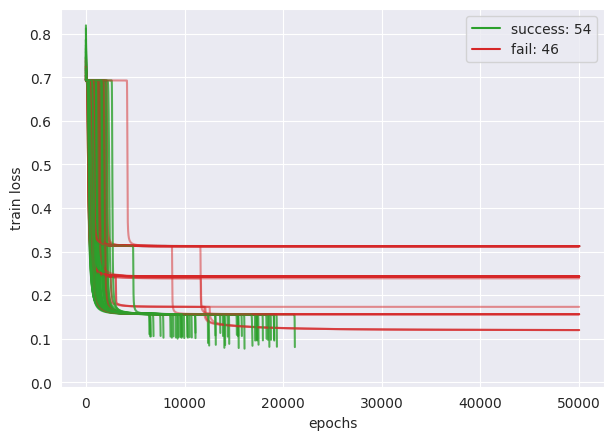

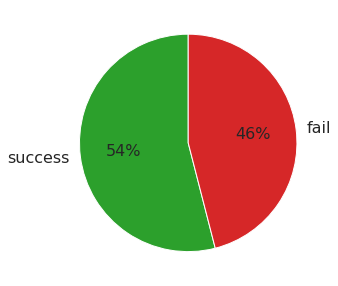

count       54.000000
mean     13190.574074
std       4092.096946
min       6440.000000
25%       9696.500000
50%      13395.500000
75%      17089.000000
max      21181.000000
Name: history_len, dtype: float64

<AxesSubplot: >

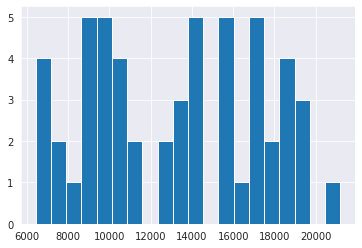

In [3]:
results_path = 'runs_results/xor_4/'
analyze_results(results_path+'run_is_1_extra.parquet')